<a href="https://colab.research.google.com/github/OlegKov33/Machine-Vision-COURSEWORK/blob/main/CM4126_Coursework_Machine_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
[Link to paper that was used](https://www.nature.com/articles/s41598-021-99015-3)

This project was brought by the paper by Scientific Reports. I used 15,153 images in total, compared to 8461 that the paper claims to have used. The problem that is being attempted is being able to detect lung infections like covid and penumonia, which myself and the paper are trying to solve. The aim is to recreate the algorithm the paper used, determin its accuracy and attempt to improve it with various techniques.


The paper by Dandi Yang et. al. used 3 datasets which I beleve I was able to find on kaggle. [COVID-19 Radiography Database](https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database), [Labeled Optical Coherence Tomography and Chest X-Ray Images for Classification](https://www.kaggle.com/datasets/anirudhcv/labeled-optical-coherence-tomography-oct) and [SARS-CoV-2 CT Scan Dataset](https://www.kaggle.com/datasets/plameneduardo/sarscov2-ctscan-dataset), and according to their "Ethical approval" section, the data was obtained from public domains and complied with ethical standards.

---

The authors have used the following convolutional neural networks(CNN) algorithms: ResNet50, ResNet152, DenseNet121 and VGG16 were used with fastai(deep learning library). The paper used 20 and 100 epochs for their training, which would take a lot of time, resources, and computational power, therefore making it unusable in an immediate deployment but proficient in the long term. [Table 7](https://www.nature.com/articles/s41598-021-99015-3/tables/7) showed the best results but didn't show COVID explicitly. Yes, they showed "X-ray for three-class", but why not just say COVID? I assume that is because not all of CNN algorithms might have been successful. Additionally, the authors claim to have used 12 techniques according to [table 6](https://www.nature.com/articles/s41598-021-99015-3/tables/6); however, the results table isn't complete, nor did they address why. The paper didn't have a baseline model on the dataset that could show the accuracy of a model on the standard dataset, which could have been used to compare against their proposed solution.

---

Interestingly, istead of training their algorithm on data of 3 classes: covid, penumonia and normal. They instead trained it on 2 classes covid-normal, covid-penumonia and covid-pneumonia-normal. In terms of results, Dandi Yang et. al. showed results for VGG16 for [COVID-normal](https://www.nature.com/articles/s41598-021-99015-3/figures/5), [COVID-pneumonia](https://www.nature.com/articles/s41598-021-99015-3/figures/7) and [COVID-pneumonia-normal](https://www.nature.com/articles/s41598-021-99015-3/figures/9) without indicating what algorithm was it for. They also showed the epoch/accuracy for VGG16 [COVID-normal](https://www.nature.com/articles/s41598-021-99015-3/figures/6) and [COVID-pneumonia](https://www.nature.com/articles/s41598-021-99015-3/figures/8), lastly they compared [ResNet50 and ResNet152](https://www.nature.com/articles/s41598-021-99015-3/figures/11). In conclusion the authors have clearly stated their datasets, their equipement(above ethical part) and have mentioned that ther have room for improvmenet as they could expand their lung infections from covid/penumonia to tuberculosis, AIDS, COVID-19, etc. However, to do so, they would need a lot more data.

## Loadig dataset

[COVID-19 Radiography Database](https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database) from article 25



consisted of 8461 total chest X-ray images accurding to paper. However, I discovered 15,153 images instead.


## Exploring dataset


I will start with showing the data in sum and pie chart forms. (All the code in this section is made with DeepSeek)

In [ ]:
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")

print("Path to dataset files:", path)
source_dir = path
destination_dir = '/content/drive/My Drive/MyDatasets'
os.makedirs(destination_dir, exist_ok=True)
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)
print(f"Files copied to: {destination_dir}")

Path to dataset files: /kaggle/input/covid19-radiography-database
Files copied to: /content/drive/My Drive/MyDatasets


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Define paths to each class
base_path = "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset"
class_paths = {
    "COVID": os.path.join(base_path, "COVID", "images"),
    "Normal": os.path.join(base_path, "Normal", "images"),
    "Viral Pneumonia": os.path.join(base_path, "Viral Pneumonia", "images")
}

# Count number of images in each class
class_counts = {cls: len(os.listdir(path)) for cls, path in class_paths.items()}
total_images = sum(class_counts.values())

print("Class distribution:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images ({count/total_images:.1%})")

Class distribution:
COVID: 3616 images (23.9%)
Normal: 10192 images (67.3%)
Viral Pneumonia: 1345 images (8.9%)


Pie visualisation of class distribution above

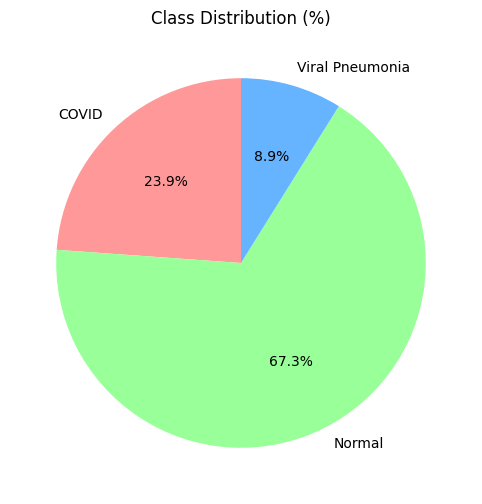

In [ ]:
# Pie chart of class distribution
plt.figure(figsize=(8, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%',colors=['#ff9999','#99ff99','#66b3ff'],  startangle=90)
plt.title('Class Distribution (%)')
plt.show()

Reducing normal data to: 10192 --> 4,961

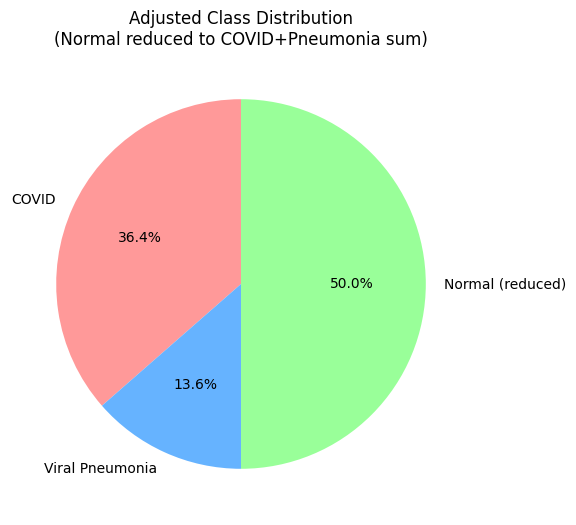

In [ ]:
# Calculate the sum of COVID and Pneumonia cases
covid_pneumonia_sum = class_counts["COVID"] + class_counts["Viral Pneumonia"]

# Create adjusted distribution
adjusted_counts = {
    "COVID": class_counts["COVID"],
    "Viral Pneumonia": class_counts["Viral Pneumonia"],
    "Normal (reduced)": covid_pneumonia_sum
}

# Plot adjusted distribution as pie chart
plt.figure(figsize=(8, 6))
plt.pie(adjusted_counts.values(),
        labels=adjusted_counts.keys(),
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99'])  # Adding colors for better distinction
plt.title('Adjusted Class Distribution\n(Normal reduced to COVID+Pneumonia sum)')
plt.show()

Bar graph to show difference in scale.

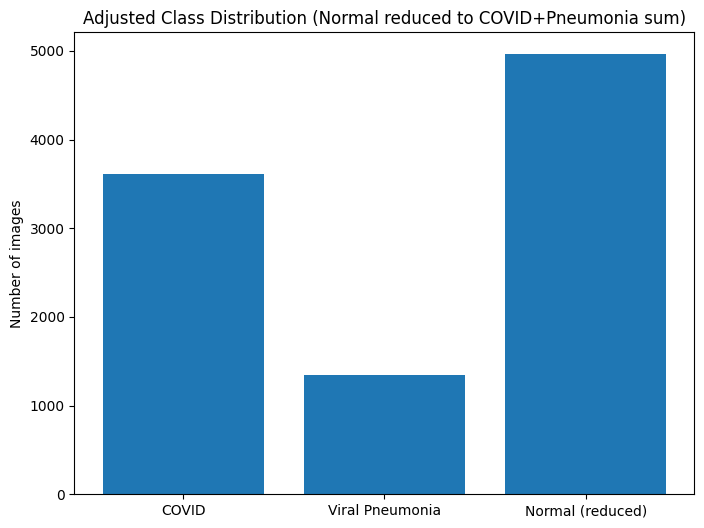

In [ ]:
# Calculate the sum of COVID and Pneumonia cases
covid_pneumonia_sum = class_counts["COVID"] + class_counts["Viral Pneumonia"]

# Create adjusted distribution
adjusted_counts = {
    "COVID": class_counts["COVID"],
    "Viral Pneumonia": class_counts["Viral Pneumonia"],
    "Normal (reduced)": covid_pneumonia_sum
}

# Plot adjusted distribution
plt.figure(figsize=(8, 6))
plt.bar(adjusted_counts.keys(), adjusted_counts.values())
plt.title('Adjusted Class Distribution (Normal reduced to COVID+Pneumonia sum)')
plt.ylabel('Number of images')
plt.show()

Now I would like to present to you the data in 2 formats.

(1) - dataset from Kaggle

(2) - Same dataset but with modifications of sharpening and contrast. The goal is have clear edges for easier training.

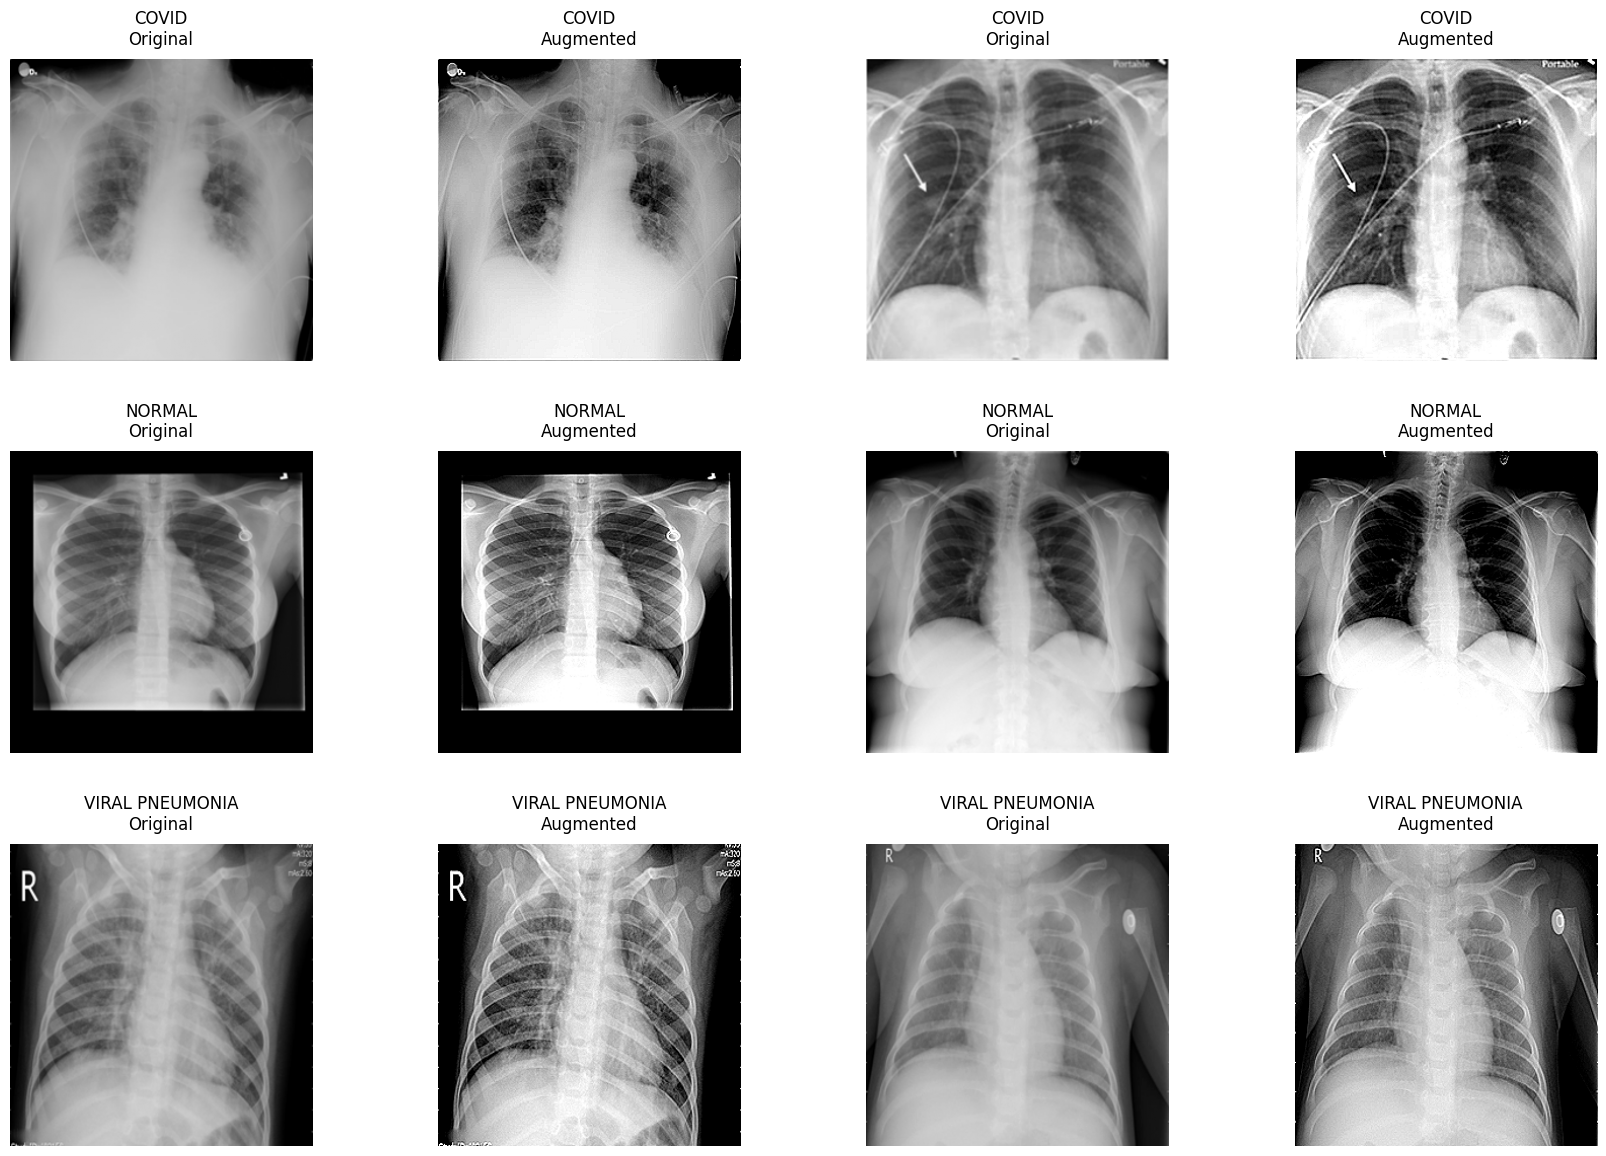

In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

def apply_sharpening(image):
    """Applies sharpening to the image using OpenCV."""
    sharpen_kernel = np.array([[0, -1, 0],
                             [-1,  5, -1],
                             [0, -1, 0]])
    return cv2.filter2D(image, -1, sharpen_kernel)

def apply_contrast(image, factor=1.5):
    """Increases contrast using PIL's ImageEnhance."""
    pil_image = Image.fromarray(image)
    enhancer = ImageEnhance.Contrast(pil_image)
    return np.array(enhancer.enhance(factor))

# Create figure with proper layout
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
fig.tight_layout(pad=3.0)

for row, (cls, path) in enumerate(class_paths.items()):
    img_files = sorted(os.listdir(path))

    # Get first and last image
    sample_indices = [0, -1]
    img_paths = [os.path.join(path, img_files[i]) for i in sample_indices]

    for col, img_path in enumerate(img_paths):
        # Load and process images
        original = np.array(Image.open(img_path))
        augmented = apply_contrast(apply_sharpening(original))

        # Plot original (left column)
        axes[row, col*2].imshow(original, cmap='gray')
        axes[row, col*2].set_title(f"{cls.upper()}\nOriginal", pad=10)
        axes[row, col*2].axis('off')

        # Plot augmented (right column)
        axes[row, col*2+1].imshow(augmented, cmap='gray')
        axes[row, col*2+1].set_title(f"{cls.upper()}\nAugmented", pad=10)
        axes[row, col*2+1].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

Here you can see the image dimensions (299 x 299) pixels

In [ ]:
def check_dimensions(class_path):
    dimensions = set()
    for img_file in os.listdir(class_path)[:100]:  # Sample 100
        img = Image.open(os.path.join(class_path, img_file))
        dimensions.add(img.size)
    return dimensions

for cls, path in class_paths.items():
    print(f"{cls} dimensions:", check_dimensions(path))

COVID dimensions: {(299, 299)}
Normal dimensions: {(299, 299)}
Viral Pneumonia dimensions: {(299, 299)}


# This coursework was made with help of ChatGPT and DeepSeek

## Prerequisite
Run before anything else

In [2]:
!pip install kagglehub
import kagglehub
import shutil
import os
import cv2
import numpy as np
from PIL import Image, ImageEnhance
from google.colab import drive
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                    Dropout, BatchNormalization, GlobalAveragePooling2D, LeakyReLU,
                                    SpatialDropout2D)
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

The first model is our baseline, we take the dataset, we use model from the [paper](https://www.nature.com/articles/s41598-021-99015-3) and observe the results.

## Model classic images (no modifications)
Original dataset from [Kaggle](https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database)

### Dataset
Import dataset with kagglehub and store it on the drive

In [ ]:
# Download latest version
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")

print("Path to dataset files:", path)
#/root/.cache/kagglehub/datasets/tawsifurrahman/covid19-radiography-database/versions/5

# Source directory (where the files are currently located)
#source_dir = '/root/.cache/kagglehub/datasets/tawsifurrahman/covid19-radiography-database/versions/5'
source_dir = path

# Destination directory (in your Google Drive)
# Assumes you have a folder named 'MyDatasets' in your Google Drive
destination_dir = '/content/drive/My Drive/MyDatasets'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the files
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

print(f"Files copied to: {destination_dir}")

Path to dataset files: /kaggle/input/covid19-radiography-database
Files copied to: /content/drive/My Drive/MyDatasets


Then, from drive we remove everything unnessesary such as image masks, xlsx files, txt and Lung_Opacity as it doesn't seem to be useful and could instead confuse the model rather than train it.

In [ ]:
drive.mount('/content/drive')
# Directory removal function (unchanged)
def directoryRemover(directory_to_remove):
    if os.path.exists(directory_to_remove):
        try:
            shutil.rmtree(directory_to_remove)
            print(f"Successfully removed directory: {directory_to_remove}")
        except OSError as e:
            print(f"Error removing directory: {directory_to_remove}. Reason: {e}")
    else:
        print(f"Directory does not exist: {directory_to_remove}")

# Directories to remove (unchanged)
directory_to_remove = [
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/README.md.txt",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx"
]

for dir in directory_to_remove:
    directoryRemover(dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/masks
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/images
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/masks
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/masks
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/masks
Error removing directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx. Reason: [Errno 20] Not a directory: '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx'
Error removing directory: /content/drive/My Drive/MyDatasets/COVID-19_Ra

Here we use the remaining dataset and send it elsewhere. We divide the dataset with 80/20 ratio, 80% train, 20% test.

In [ ]:
# prompt: using random seed, create a new folder structure with 80% of each images in train and 20% in test images.
# i.e. train (covid 80%)(normal 80%)(penumonia 80%), test(same but 20%) create a folder in /content

def split_images(source_dir, train_dir, test_dir, split_ratio=0.8):
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    for filename in os.listdir(source_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(source_dir, filename)
            if random.random() < split_ratio:
                destination_path = os.path.join(train_dir, filename)
            else:
                destination_path = os.path.join(test_dir, filename)
            shutil.copy(file_path, destination_path)

# Example usage
base_dir = '/content/dataset3' # create a base directory
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Define source and destination directories for covid images
covid_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/images'
covid_train_dir = os.path.join(base_dir, 'train', 'covid')
covid_test_dir = os.path.join(base_dir, 'test', 'covid')

# Define source and destination directories for normal images
normal_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/images'
normal_train_dir = os.path.join(base_dir, 'train', 'normal')
normal_test_dir = os.path.join(base_dir, 'test', 'normal')

# Define source and destination directories for pneumonia images
pneumonia_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/images'
pneumonia_train_dir = os.path.join(base_dir, 'train', 'pneumonia')
pneumonia_test_dir = os.path.join(base_dir, 'test', 'pneumonia')


# Split images for covid, normal, and pneumonia
split_images(covid_source, covid_train_dir, covid_test_dir)
split_images(normal_source, normal_train_dir, normal_test_dir)
split_images(pneumonia_source, pneumonia_train_dir, pneumonia_test_dir)


### Model
The model was copied from the original [paper](https://www.nature.com/articles/s41598-021-99015-3), figure 2.

In [ ]:
def create_vgg_style_model(input_shape=(224, 224, 3), num_classes=3):
    model = Sequential(name="OralLesionCNN_PaperVersion")

    # --- Conv Block 1 ---
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Conv Block 2 ---
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Conv Block 3 ---
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Conv Block 4 ---
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Conv Block 5 ---
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Classifier Head ---
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', name='fc6'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu', name='fc7'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax', name='fc8'))

    # Freeze all convolutional layers to mimic paper's approach
    for layer in model.layers:
        if isinstance(layer, Conv2D):
            layer.trainable = False
        # Keep BatchNorm layers trainable
        if isinstance(layer, BatchNormalization):
            layer.trainable = True

    return model

# Initialize model
model = create_vgg_style_model(input_shape=(224, 224, 3), num_classes=3)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "OralLesionCNN_PaperVersion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc6 (Dense)                     │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc7 (Dense)                     │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc8 (Dense)                     │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,790,019 (106.01 MB)

 Trainable params: 26,219,459 (100.02 MB)

 Non-trainable params: 1,570,560 (5.99 MB)

In [ ]:
# Define paths
train_dir = '/content/dataset3/train'
test_dir = '/content/dataset3/test'

# Image dimensions (match VGG input shape)
img_height, img_width = 256, 256
batch_size = 32

# Data generators (with augmentation for training)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'  # Labels are integers (0, 1, 2)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

# Check class indices
print("Class indices:", train_generator.class_indices)

Found 12060 images belonging to 3 classes.
Found 3093 images belonging to 3 classes.
Class indices: {'covid': 0, 'normal': 1, 'pneumonia': 2}


Before the model is trained, there were a total of 15,153 images. 12112 were used for training and 3041 for testing. After 10 epochs, the accuracy didn't improve much. Going from 66.2 - 85.4 %



In [ ]:
model = create_vgg_style_model(input_shape=(256, 256, 3), num_classes=3)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 228s 574ms/step - accuracy: 0.6622 - loss: 7.8043 - val_accuracy: 0.4711 - val_loss: 1.7817
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 201s 534ms/step - accuracy: 0.7327 - loss: 0.7597 - val_accuracy: 0.8002 - val_loss: 0.5057
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 205s 543ms/step - accuracy: 0.7658 - loss: 0.5967 - val_accuracy: 0.8516 - val_loss: 0.3892
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 208s 551ms/step - accuracy: 0.7987 - loss: 0.5117 - val_accuracy: 0.8451 - val_loss: 0.3623
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 203s 539ms/step - accuracy: 0.8207 - loss: 0.4713 - val_accuracy: 0.8904 - val_loss: 0.3359
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 260s 535ms/step - accuracy: 0.8329 - loss: 0.4245 - val_accuracy: 0.8952 - val_loss: 0.3246
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 201s 533ms/step - accuracy: 0.8403 - loss: 0.4034 - val_accuracy: 0.8830 - val_loss: 0.3343
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 204s 540ms/step - accuracy: 0.8371 -

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save model
model.save('covid_pneumonia_vgg.h5')

97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9184 - loss: 0.2154


Test Accuracy: 91.95%


Upon closer inspection, the models accuracy isn't 85/91 % it is in fact 54%. It isn't good but isn't bad either.

In [ ]:
# Load best model
model = tf.keras.models.load_model('/content/covid_pneumonia_vgg.h5')

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# Get true labels and predictions
test_generator.reset()
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - accuracy: 0.9148 - loss: 0.2275

Test Accuracy: 91.95%
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step

Classification Report:
              precision    recall  f1-score   support

       covid       0.25      0.21      0.23       768
      normal       0.67      0.72      0.69      2060
   pneumonia       0.09      0.09      0.09       265

    accuracy                           0.54      3093
   macro avg       0.34      0.34      0.34      3093
weighted avg       0.51      0.54      0.52      3093


Confusion Matrix:
[[ 159  552   57]
 [ 413 1474  173]
 [  56  185   24]]


## Model images modified (sharpen + contrast)
Modified dataset from [Kaggle](https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database) with sharpening and contrast

### Dataset
Unlike the previos dataset, this dataset, I wanted to augment to both sharpen and contrast. Sharpen - to form clear edges. Contrast - to show clear distinction between bones and human tissue(lungs)

In [ ]:
# Download latest version
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")

print("Path to dataset files:", path)
#/root/.cache/kagglehub/datasets/tawsifurrahman/covid19-radiography-database/versions/5


# Source directory (where the files are currently located)
#source_dir = '/root/.cache/kagglehub/datasets/tawsifurrahman/covid19-radiography-database/versions/5'
source_dir = path

# Destination directory (in your Google Drive)
# Assumes you have a folder named 'MyDatasets' in your Google Drive
destination_dir = '/content/drive/My Drive/MyDatasets'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the files
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

print(f"Files copied to: {destination_dir}")

Path to dataset files: /kaggle/input/covid19-radiography-database
Files copied to: /content/drive/My Drive/MyDatasets


In [ ]:
drive.mount('/content/drive')

# Define image directories
image_dirs = [
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/images"
]

def apply_sharpening(image):
    """Applies sharpening to the image using OpenCV."""
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1,  5, -1],
                               [0, -1, 0]])
    return cv2.filter2D(image, -1, sharpen_kernel)

def apply_contrast(image, factor=1.5):
    """Increases contrast using PIL's ImageEnhance."""
    pil_image = Image.fromarray(image)  # Convert OpenCV image to PIL
    enhancer = ImageEnhance.Contrast(pil_image)
    return np.array(enhancer.enhance(factor))  # Convert back to NumPy array

def process_images(image_dir):
    print(f"Processing images in: {image_dir}")

    # Get all image files (no limit)
    all_images = [f for f in os.listdir(image_dir)
                 if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for filename in all_images:
        image_path = os.path.join(image_dir, filename)

        # Load image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Skipping invalid image: {filename}")
            continue

        # Apply processing
        img = apply_sharpening(img)
        img = apply_contrast(img)

        # Remove original file
        os.remove(image_path)

        # Save processed image with original filename (replaces original)
        cv2.imwrite(image_path, img)

        print(f"Processed and replaced: {filename}")

# Process each directory
for directory in image_dirs:
    process_images(directory)

print("✅ Image processing complete. Original images have been replaced with processed versions!")

# Directory removal function (unchanged)
def directoryRemover(directory_to_remove):
    if os.path.exists(directory_to_remove):
        try:
            shutil.rmtree(directory_to_remove)
            print(f"Successfully removed directory: {directory_to_remove}")
        except OSError as e:
            print(f"Error removing directory: {directory_to_remove}. Reason: {e}")
    else:
        print(f"Directory does not exist: {directory_to_remove}")

# Directories to remove (unchanged)
directory_to_remove = [
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/README.md.txt",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx"
]

for dir in directory_to_remove:
    directoryRemover(dir)

Streaming output truncated to the last 5000 lines.
Processed and replaced: Normal-5934.png
Processed and replaced: Normal-875.png
Processed and replaced: Normal-5531.png
Processed and replaced: Normal-6102.png
Processed and replaced: Normal-9531.png
Processed and replaced: Normal-6910.png
Processed and replaced: Normal-9584.png
Processed and replaced: Normal-2688.png
Processed and replaced: Normal-6677.png
Processed and replaced: Normal-7037.png
Processed and replaced: Normal-2015.png
Processed and replaced: Normal-103.png
Processed and replaced: Normal-1872.png
Processed and replaced: Normal-8104.png
Processed and replaced: Normal-868.png
Processed and replaced: Normal-3519.png
Processed and replaced: Normal-4854.png
Processed and replaced: Normal-4046.png
Processed and replaced: Normal-2890.png
Processed and replaced: Normal-1176.png
Processed and replaced: Normal-6631.png
Processed and replaced: Normal-4772.png
Processed and replaced: Normal-3622.png
Processed and replaced: Normal-5

In [ ]:
# prompt: using random seed, create a new folder structure with 80% of each images in train and 20% in test images.
# i.e. train (covid 80%)(normal 80%)(penumonia 80%), test(same but 20%) create a folder in /content


def split_images(source_dir, train_dir, test_dir, split_ratio=0.8):
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    for filename in os.listdir(source_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(source_dir, filename)
            if random.random() < split_ratio:
                destination_path = os.path.join(train_dir, filename)
            else:
                destination_path = os.path.join(test_dir, filename)
            shutil.copy(file_path, destination_path)

# Example usage
base_dir = '/content/dataset2' # create a base directory
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Define source and destination directories for covid images
covid_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/images'
covid_train_dir = os.path.join(base_dir, 'train', 'covid')
covid_test_dir = os.path.join(base_dir, 'test', 'covid')

# Define source and destination directories for normal images
normal_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/images'
normal_train_dir = os.path.join(base_dir, 'train', 'normal')
normal_test_dir = os.path.join(base_dir, 'test', 'normal')

# Define source and destination directories for pneumonia images
pneumonia_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/images'
pneumonia_train_dir = os.path.join(base_dir, 'train', 'pneumonia')
pneumonia_test_dir = os.path.join(base_dir, 'test', 'pneumonia')


# Split images for covid, normal, and pneumonia
split_images(covid_source, covid_train_dir, covid_test_dir)
split_images(normal_source, normal_train_dir, normal_test_dir)
split_images(pneumonia_source, pneumonia_train_dir, pneumonia_test_dir)


### Model

In [ ]:
def create_vgg_style_model(input_shape=(224, 224, 3), num_classes=3):
    model = Sequential(name="OralLesionCNN_PaperVersion")

    # --- Conv Block 1 ---
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Conv Block 2 ---
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Conv Block 3 ---
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Conv Block 4 ---
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Conv Block 5 ---
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Classifier Head ---
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', name='fc6'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu', name='fc7'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax', name='fc8'))

    # Freeze all convolutional layers to mimic paper's approach
    for layer in model.layers:
        if isinstance(layer, Conv2D):
            layer.trainable = False
        # Keep BatchNorm layers trainable
        if isinstance(layer, BatchNormalization):
            layer.trainable = True

    return model

# Initialize model
model = create_vgg_style_model(input_shape=(224, 224, 3), num_classes=3)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "OralLesionCNN_PaperVersion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc6 (Dense)                     │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc7 (Dense)                     │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc8 (Dense)                     │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,790,019 (106.01 MB)

 Trainable params: 26,219,459 (100.02 MB)

 Non-trainable params: 1,570,560 (5.99 MB)

In [ ]:
# Define paths
train_dir = '/content/dataset2/train'
test_dir = '/content/dataset2/test'

# Image dimensions (match VGG input shape)
img_height, img_width = 256, 256
batch_size = 32

# Data generators (with augmentation for training)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'  # Labels are integers (0, 1, 2)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

# Check class indices
print("Class indices:", train_generator.class_indices)

Found 12068 images belonging to 3 classes.
Found 3085 images belonging to 3 classes.
Class indices: {'covid': 0, 'normal': 1, 'pneumonia': 2}


The modified model had similar results to the original one but was slightly better, there were a total of 15,153 images. 12068 were used for training and 3085 for testing. After 10 epochs, the accuracy improved a little. Going from 66.6 - **88.6** %. Having 3.2% increase in training accuracy compared to the original model (**85.4%**).

In [ ]:
model = create_vgg_style_model(input_shape=(256, 256, 3), num_classes=3)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 217s 546ms/step - accuracy: 0.6658 - loss: 7.7642 - val_accuracy: 0.2917 - val_loss: 4.2252
Epoch 2/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 195s 515ms/step - accuracy: 0.7499 - loss: 0.7193 - val_accuracy: 0.7770 - val_loss: 0.5175
Epoch 3/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 195s 517ms/step - accuracy: 0.7926 - loss: 0.5503 - val_accuracy: 0.8207 - val_loss: 0.4425
Epoch 4/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 196s 518ms/step - accuracy: 0.8133 - loss: 0.4838 - val_accuracy: 0.8256 - val_loss: 0.4266
Epoch 5/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 191s 505ms/step - accuracy: 0.8281 - loss: 0.4413 - val_accuracy: 0.8658 - val_loss: 0.3463
Epoch 6/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 192s 508ms/step - accuracy: 0.8468 - loss: 0.4198 - val_accuracy: 0.7744 - val_loss: 0.5260
Epoch 7/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 195s 517ms/step - accuracy: 0.8588 - loss: 0.3778 - val_accuracy: 0.8337 - val_loss: 0.4114
Epoch 8/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 192s 508ms/step - accuracy: 0.8667 -

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save model
model.save('covid_pneumonia_vgg.h5')

97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8982 - loss: 0.2800


Test Accuracy: 89.69%


In [ ]:
# Load best model
model = tf.keras.models.load_model('/content/covid_pneumonia_vgg.h5')

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# Get true labels and predictions
test_generator.reset()
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.8939 - loss: 0.2859

Test Accuracy: 89.69%
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step

Classification Report:
              precision    recall  f1-score   support

       covid       0.26      0.27      0.27       743
      normal       0.67      0.69      0.68      2056
   pneumonia       0.10      0.09      0.09       286

    accuracy                           0.53      3085
   macro avg       0.35      0.35      0.35      3085
weighted avg       0.52      0.53      0.53      3085


Confusion Matrix:
[[ 200  484   59]
 [ 489 1410  157]
 [  66  195   25]]


## Model increaded (size increased)
Since I couldn't improve the model by enchansing the images drastically, the idea was to reduce the dataset; Type: from - to

Original Total: 15153 - 9,922
1. COVID: 3,616
2. Normal: 10,192 - 4,961
3. Pneumonia: 1,345
--- --- --- ---

New Total: 9,922 - 19,844
1. COVID: 3,616 - 7,232
2. Normal: 4,961 - 9,922
3. Pneumonia: 1,345 - 2,690

Dataset was reduced to 9922, afterwards increased to 19,844 by creating sharpen and contrat images to 9922 original images. The reason why was the following: the normal images take 67% of dataset which is likely impacting accuracy as few images COVID and pneumonia are present. By reducing the numbers, penumnia size increased from to **8.9 - 13.6%**.


Since augmented dataset performed similarly to original, the theory was that by adding augmented images to original, I would give model more data to work with and thus improving the models accuracy in the process.

### Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")

print("Path to dataset files:", path)
#/root/.cache/kagglehub/datasets/tawsifurrahman/covid19-radiography-database/versions/5


# Source directory (where the files are currently located)
#source_dir = '/root/.cache/kagglehub/datasets/tawsifurrahman/covid19-radiography-database/versions/5'
source_dir = path

# Destination directory (in your Google Drive)
# Assumes you have a folder named 'MyDatasets' in your Google Drive
destination_dir = '/content/drive/My Drive/MyDatasets'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the files
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

print(f"Files copied to: {destination_dir}")

Path to dataset files: /kaggle/input/covid19-radiography-database
Files copied to: /content/drive/My Drive/MyDatasets


In [ ]:
drive.mount('/content/drive')

# Define image directories
image_dirs = [
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/images"
]

def apply_sharpening(image):
    """Applies sharpening to the image using OpenCV."""
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1,  5, -1],
                               [0, -1, 0]])
    return cv2.filter2D(image, -1, sharpen_kernel)

def apply_contrast(image, factor=1.5):
    """Increases contrast using PIL's ImageEnhance."""
    pil_image = Image.fromarray(image)  # Convert OpenCV image to PIL
    enhancer = ImageEnhance.Contrast(pil_image)
    return np.array(enhancer.enhance(factor))  # Convert back to NumPy array

def process_images(image_dir, max_normal_images=4961):
    print(f"Processing images in: {image_dir}")

    # Get all image files
    all_images = [f for f in os.listdir(image_dir)
                 if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # If this is the Normal directory, limit number of images
    if "Normal" in image_dir and len(all_images) > max_normal_images:
        all_images = random.sample(all_images, max_normal_images)
        print(f"Sampled down to {max_normal_images} normal images")

    for filename in all_images:
        image_path = os.path.join(image_dir, filename)

        # Load image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Skipping invalid image: {filename}")
            continue

        # Apply processing
        img = apply_sharpening(img)
        img = apply_contrast(img)

        # Save with modified_ prefix instead of replacing original
        new_filename = f"modified_{filename}"
        new_path = os.path.join(image_dir, new_filename)
        cv2.imwrite(new_path, img)

        print(f"Saved modified version: {new_filename}")

# Process each directory
for direcotry in image_dirs:
    process_images(direcotry)

print("✅ Image processing complete. Original images preserved with modified versions saved!")

# Directory removal function (unchanged)
def directoryRemover(directory_to_remove):
    if os.path.exists(directory_to_remove):
        try:
            shutil.rmtree(directory_to_remove)
            print(f"Successfully removed directory: {directory_to_remove}")
        except OSError as e:
            print(f"Error removing directory: {directory_to_remove}. Reason: {e}")
    else:
        print(f"Directory does not exist: {directory_to_remove}")

# Directories to remove (unchanged)
directory_to_remove = [
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/README.md.txt",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx"
]

for dir in directory_to_remove:
    directoryRemover(dir)

Streaming output truncated to the last 5000 lines.
Saved modified version: modified_Normal-6505.png
Saved modified version: modified_Normal-5770.png
Saved modified version: modified_Normal-5891.png
Saved modified version: modified_Normal-2230.png
Saved modified version: modified_Normal-9156.png
Saved modified version: modified_Normal-9161.png
Saved modified version: modified_Normal-8233.png
Saved modified version: modified_Normal-6349.png
Saved modified version: modified_Normal-5778.png
Saved modified version: modified_Normal-7170.png
Saved modified version: modified_Normal-8179.png
Saved modified version: modified_Normal-914.png
Saved modified version: modified_Normal-2252.png
Saved modified version: modified_Normal-8046.png
Saved modified version: modified_Normal-7407.png
Saved modified version: modified_Normal-9202.png
Saved modified version: modified_Normal-5782.png
Saved modified version: modified_Normal-2368.png
Saved modified version: modified_Normal-8904.png
Saved modified vers

In [ ]:
# prompt: using random seed, create a new folder structure with 80% of each images in train and 20% in test images.
# i.e. train (covid 80%)(normal 80%)(penumonia 80%), test(same but 20%) create a folder in /content


def split_images(source_dir, train_dir, test_dir, split_ratio=0.8):
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    for filename in os.listdir(source_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(source_dir, filename)
            if random.random() < split_ratio:
                destination_path = os.path.join(train_dir, filename)
            else:
                destination_path = os.path.join(test_dir, filename)
            shutil.copy(file_path, destination_path)

# Example usage
base_dir = '/content/dataset2' # create a base directory
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Define source and destination directories for covid images
covid_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/images'
covid_train_dir = os.path.join(base_dir, 'train', 'covid')
covid_test_dir = os.path.join(base_dir, 'test', 'covid')

# Define source and destination directories for normal images
normal_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/images'
normal_train_dir = os.path.join(base_dir, 'train', 'normal')
normal_test_dir = os.path.join(base_dir, 'test', 'normal')

# Define source and destination directories for pneumonia images
pneumonia_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/images'
pneumonia_train_dir = os.path.join(base_dir, 'train', 'pneumonia')
pneumonia_test_dir = os.path.join(base_dir, 'test', 'pneumonia')


# Split images for covid, normal, and pneumonia
split_images(covid_source, covid_train_dir, covid_test_dir)
split_images(normal_source, normal_train_dir, normal_test_dir)
split_images(pneumonia_source, pneumonia_train_dir, pneumonia_test_dir)


### Model

Interesting. The model seems to has become overfitted in training accuracy. Now with 75.1 - 97.7% vs 66.6 - 88.6% before. However, the actual accuracy has decreased from: 54% to 46% when compared to original.

In [ ]:
def create_vgg_style_model(input_shape=(256, 256, 3), num_classes=3):
    model = Sequential(name="OralLesionCNN_PaperVersion")

    # --- Conv Block 1 ---
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Conv Block 2 ---
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Conv Block 3 ---
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Conv Block 4 ---
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Conv Block 5 ---
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2))

    # --- Updated Classifier Head ---
    model.add(Flatten())
    model.add(Dense(2048, activation='relu', name='fc6'))  # Increased capacity
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu', name='fc7'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax', name='fc8'))

    # Freeze conv layers
    for layer in model.layers:
        if isinstance(layer, Conv2D):
            layer.trainable = False
    return model



In [ ]:
# Define paths
train_dir = '/content/dataset2/train'
test_dir = '/content/dataset2/test'

# Image dimensions (match VGG input shape)
img_height, img_width = 256, 256
batch_size = 32

# Data generators (with augmentation for training)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'  # Labels are integers (0, 1, 2)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

# Check class indices
print("Class indices:", train_generator.class_indices)

Found 20142 images belonging to 3 classes.
Found 4933 images belonging to 3 classes.
Class indices: {'covid': 0, 'normal': 1, 'pneumonia': 2}


In [ ]:
# Set up the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# These should point to the correct directories with subfolders for each class
train_generator = train_datagen.flow_from_directory(
    '/content/dataset2/train',              # <- replace with your actual path
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'      # <- this fixes the shape issue
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset2/test',               # <- replace with your actual path
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)


Found 20142 images belonging to 3 classes.
Found 4933 images belonging to 3 classes.


In [ ]:
# Initialize model
model = create_vgg_style_model(input_shape=(256, 256, 3), num_classes=3)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Model: "OralLesionCNN_PaperVersion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc6 (Dense)                     │ (None, 2048)           │    67,110,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc7 (Dense)                     │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc8 (Dense)                     │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,734,083 (266.01 MB)

 Trainable params: 68,163,523 (260.02 MB)

 Non-trainable params: 1,570,560 (5.99 MB)

Epoch 1/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 111s 157ms/step - accuracy: 0.7506 - loss: 1.7807 - val_accuracy: 0.8938 - val_loss: 0.2772
Epoch 2/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 79s 125ms/step - accuracy: 0.8783 - loss: 0.4806 - val_accuracy: 0.9416 - val_loss: 0.1642
Epoch 3/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 92s 141ms/step - accuracy: 0.9108 - loss: 0.2918 - val_accuracy: 0.9465 - val_loss: 0.1439
Epoch 4/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 80s 126ms/step - accuracy: 0.9276 - loss: 0.2273 - val_accuracy: 0.9453 - val_loss: 0.1484
Epoch 5/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.9404 - loss: 0.2177 - val_accuracy: 0.9627 - val_loss: 0.1057
Epoch 6/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 80s 127ms/step - accuracy: 0.9517 - loss: 0.1475 - val_accuracy: 0.9686 - val_loss: 0.0885
Epoch 7/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 77s 122ms/step - accuracy: 0.9602 - loss: 0.1248 - val_accuracy: 0.9704 - val_loss: 0.0794
Epoch 8/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 78s 124ms/step - accuracy: 0.9638 - loss: 

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save model
model.save('covid_pneumonia_vgg.h5')

155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9725 - loss: 0.0810


Test Accuracy: 97.38%


In [ ]:
# Load best model
model = tf.keras.models.load_model('/content/covid_pneumonia_vgg.h5')

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


# Get true labels and predictions
test_generator.reset()
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.9724 - loss: 0.0864

Test Accuracy: 97.38%
155/155 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step

Classification Report:
              precision    recall  f1-score   support

       covid       0.26      0.25      0.26      1411
      normal       0.61      0.62      0.62      3029
   pneumonia       0.08      0.09      0.08       493

    accuracy                           0.46      4933
   macro avg       0.32      0.32      0.32      4933
weighted avg       0.46      0.46      0.46      4933


Confusion Matrix:
[[ 357  887  167]
 [ 843 1873  313]
 [ 164  287   42]]


## Improvements
I am not happy with the results, I gave the model to generative ai and asked it to make it better; Paper model vs DeepSeek model vs ChatGPT

1. Total params: 27,790,019 (106.01 MB) **vs** 135,370,819 (516.40 MB) **vs** 2,361,027 (9.01 MB)
2. Trainable params: 26,219,459 (100.02 MB) **vs** 135,368,003 (516.39 MB) **vs** 2,358,147 (9.00 MB)
3. Non-trainable params: 1,570,560 (5.99 MB) **vs** 2,816 (11.00 KB) **vs** 2,880 (11.25 KB)

DeepSeek had over 4 times size increase compared to my original attempt, while ChatGPT had over 11 times size decrease compared to my original attempt.

## Original with DeepSeek
Since we are using the orignal dataset, it would be ideal to compare it to the original paper itself.

### Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")
print("Path to dataset files:", path)
source_dir = path

# Destination directory (in your Google Drive)
destination_dir = '/content/drive/My Drive/MyDatasets'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the files
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

print(f"Files copied to: {destination_dir}")

Path to dataset files: /kaggle/input/covid19-radiography-database
Files copied to: /content/drive/My Drive/MyDatasets


In [ ]:
drive.mount('/content/drive')
# Directory removal function (unchanged)
def directoryRemover(directory_to_remove):
    if os.path.exists(directory_to_remove):
        try:
            shutil.rmtree(directory_to_remove)
            print(f"Successfully removed directory: {directory_to_remove}")
        except OSError as e:
            print(f"Error removing directory: {directory_to_remove}. Reason: {e}")
    else:
        print(f"Directory does not exist: {directory_to_remove}")

# Directories to remove (unchanged)
directory_to_remove = [
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/README.md.txt",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx"
]

for dir in directory_to_remove:
    directoryRemover(dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/masks
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/images
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/masks
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/masks
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/masks
Error removing directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx. Reason: [Errno 20] Not a directory: '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx'
Error removing directory: /content/drive/My Drive/MyDatasets/COVID-19_Ra

### Model
The model from paper after 8 epochs had the following results:

(Paper) accuracy: 0.8371 - loss: 0.3978 - val_accuracy: 0.9182 - val_loss: 0.2699

(AI) accuracy: 0.9051 - loss: 0.2736 - val_accuracy: 0.5905 - val_loss: 1.7000

1. Accuracy - better
2. loss - better
3. val accuracy - worse
4. val loss - worse

In [ ]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

def split_images(source_dir, train_dir, val_dir, test_dir, train_ratio=0.8, val_ratio=0.1):
    """Split images into train/val/test with specified ratios"""
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(val_dir):
        os.makedirs(val_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    images = [f for f in os.listdir(source_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(images)

    train_count = int(len(images) * train_ratio)
    val_count = int(len(images) * val_ratio)

    for i, filename in enumerate(images):
        src_path = os.path.join(source_dir, filename)
        if i < train_count:
            dest_path = os.path.join(train_dir, filename)
        elif i < train_count + val_count:
            dest_path = os.path.join(val_dir, filename)
        else:
            dest_path = os.path.join(test_dir, filename)
        shutil.copy(src_path, dest_path)

# Create base directory structure
base_dir = '/content/dataset4'
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Define paths
covid_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/images'
normal_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/images'
pneumonia_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/images'

# Create splits for each class
for class_name, source_dir in [('covid', covid_source),
                             ('normal', normal_source),
                             ('pneumonia', pneumonia_source)]:
    split_images(source_dir,
                os.path.join(base_dir, 'train', class_name),
                os.path.join(base_dir, 'val', class_name),
                os.path.join(base_dir, 'test', class_name),
                train_ratio=0.8,
                val_ratio=0.1)

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Image dimensions
img_height, img_width = 256, 256
batch_size = 32

# Create data generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

print("Class indices:", train_generator.class_indices)

# Model definition (same as yours)
def create_optimized_model(input_shape=(256, 256, 3), num_classes=3):
    inputs = tf.keras.Input(shape=input_shape)

    # Block 1
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 2
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 3
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Reduced FC layers
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Initialize and compile model
model = create_optimized_model(input_shape=(256, 256, 3), num_classes=3)
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.1, patience=3),
    callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Train the model with validation
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=8,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks,
    verbose=1
)

# Load best model
model = tf.keras.models.load_model('best_model.h5')

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# Get true labels and predictions
test_generator.reset()
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Found 12121 images belonging to 3 classes.
Found 1514 images belonging to 3 classes.
Found 1518 images belonging to 3 classes.
Class indices: {'covid': 0, 'normal': 1, 'pneumonia': 2}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.6330 - loss: 1.1066

379/379 ━━━━━━━━━━━━━━━━━━━━ 360s 845ms/step - accuracy: 0.6332 - loss: 1.1059 - val_accuracy: 0.3481 - val_loss: 6.4489 - learning_rate: 1.0000e-04
Epoch 2/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.8224 - loss: 0.4952

379/379 ━━━━━━━━━━━━━━━━━━━━ 299s 718ms/step - accuracy: 0.8225 - loss: 0.4952 - val_accuracy: 0.6552 - val_loss: 1.1396 - learning_rate: 1.0000e-04
Epoch 3/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 251s 660ms/step - accuracy: 0.8629 - loss: 0.3783 - val_accuracy: 0.3844 - val_loss: 1.9537 - learning_rate: 1.0000e-04
Epoch 4/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.8430 - loss: 0.4301

379/379 ━━━━━━━━━━━━━━━━━━━━ 278s 702ms/step - accuracy: 0.8430 - loss: 0.4300 - val_accuracy: 0.7523 - val_loss: 0.9328 - learning_rate: 1.0000e-04
Epoch 5/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 639ms/step - accuracy: 0.8760 - loss: 0.3506

379/379 ━━━━━━━━━━━━━━━━━━━━ 323s 706ms/step - accuracy: 0.8760 - loss: 0.3506 - val_accuracy: 0.8098 - val_loss: 0.7088 - learning_rate: 1.0000e-04
Epoch 6/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.8938 - loss: 0.2920

379/379 ━━━━━━━━━━━━━━━━━━━━ 324s 711ms/step - accuracy: 0.8938 - loss: 0.2921 - val_accuracy: 0.8170 - val_loss: 0.5961 - learning_rate: 1.0000e-04
Epoch 7/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 639ms/step - accuracy: 0.8986 - loss: 0.2837

379/379 ━━━━━━━━━━━━━━━━━━━━ 319s 702ms/step - accuracy: 0.8986 - loss: 0.2837 - val_accuracy: 0.8217 - val_loss: 0.5245 - learning_rate: 1.0000e-04
Epoch 8/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 249s 658ms/step - accuracy: 0.9051 - loss: 0.2736 - val_accuracy: 0.5905 - val_loss: 1.7000 - learning_rate: 1.0000e-04


48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 291ms/step - accuracy: 0.8361 - loss: 0.4735

Test Accuracy: 84.12%
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step

Classification Report:
              precision    recall  f1-score   support

       covid       0.22      0.27      0.24       363
      normal       0.67      0.69      0.68      1020
   pneumonia       0.07      0.01      0.02       135

    accuracy                           0.53      1518
   macro avg       0.32      0.33      0.32      1518
weighted avg       0.51      0.53      0.52      1518


Confusion Matrix:
[[ 99 258   6]
 [299 702  19]
 [ 48  85   2]]


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │   134,218,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 135,370,819 (516.40 MB)

 Trainable params: 135,368,003 (516.39 MB)

 Non-trainable params: 2,816 (11.00 KB)

## Modified with DeepSeek
Because my attempt at data augmentation resulted in the similar accuracy as original dataset, I want to see if by changing the model my changes to data would improve it. (the fuck?) reword it plz

### Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")
print("Path to dataset files:", path)
source_dir = path

# Destination directory (in your Google Drive)
destination_dir = '/content/drive/My Drive/MyDatasets'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the files
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

print(f"Files copied to: {destination_dir}")

Path to dataset files: /kaggle/input/covid19-radiography-database
Files copied to: /content/drive/My Drive/MyDatasets


In [ ]:
drive.mount('/content/drive')

# Define image directories
image_dirs = [
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/images"
]

def apply_sharpening(image):
    """Applies sharpening to the image using OpenCV."""
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1,  5, -1],
                               [0, -1, 0]])
    return cv2.filter2D(image, -1, sharpen_kernel)

def apply_contrast(image, factor=1.5):
    """Increases contrast using PIL's ImageEnhance."""
    pil_image = Image.fromarray(image)  # Convert OpenCV image to PIL
    enhancer = ImageEnhance.Contrast(pil_image)
    return np.array(enhancer.enhance(factor))  # Convert back to NumPy array

def process_images(image_dir):
    print(f"Processing images in: {image_dir}")

    # Get all image files (no limit)
    all_images = [f for f in os.listdir(image_dir)
                 if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for filename in all_images:
        image_path = os.path.join(image_dir, filename)

        # Load image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Skipping invalid image: {filename}")
            continue

        # Apply processing
        img = apply_sharpening(img)
        img = apply_contrast(img)

        # Remove original file
        os.remove(image_path)

        # Save processed image with original filename (replaces original)
        cv2.imwrite(image_path, img)

        print(f"Processed and replaced: {filename}")

# Process each directory
for directory in image_dirs:
    process_images(directory)

print("✅ Image processing complete. Original images have been replaced with processed versions!")

# Directory removal function (unchanged)
def directoryRemover(directory_to_remove):
    if os.path.exists(directory_to_remove):
        try:
            shutil.rmtree(directory_to_remove)
            print(f"Successfully removed directory: {directory_to_remove}")
        except OSError as e:
            print(f"Error removing directory: {directory_to_remove}. Reason: {e}")
    else:
        print(f"Directory does not exist: {directory_to_remove}")

# Directories to remove (unchanged)
directory_to_remove = [
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/README.md.txt",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx"
]

for dir in directory_to_remove:
    directoryRemover(dir)

Streaming output truncated to the last 5000 lines.
Processed and replaced: Normal-6571.png
Processed and replaced: Normal-1006.png
Processed and replaced: Normal-2686.png
Processed and replaced: Normal-5219.png
Processed and replaced: Normal-9362.png
Processed and replaced: Normal-5073.png
Processed and replaced: Normal-1762.png
Processed and replaced: Normal-3795.png
Processed and replaced: Normal-9513.png
Processed and replaced: Normal-4261.png
Processed and replaced: Normal-3331.png
Processed and replaced: Normal-9745.png
Processed and replaced: Normal-3103.png
Processed and replaced: Normal-732.png
Processed and replaced: Normal-211.png
Processed and replaced: Normal-1125.png
Processed and replaced: Normal-5186.png
Processed and replaced: Normal-9839.png
Processed and replaced: Normal-2738.png
Processed and replaced: Normal-1791.png
Processed and replaced: Normal-8330.png
Processed and replaced: Normal-7771.png
Processed and replaced: Normal-5002.png
Processed and replaced: Normal-

### Model
If we compare augmented model from paper and this we will see that: (I am 2 augmented datasets and not augmeted vs paper)

(Paper) accuracy: 0.8667 - loss: 0.3587 - val_accuracy: 0.8408 - val_loss: 0.3648

(AI) accuracy: 0.9293 - loss: 0.2060 - val_accuracy: 0.9079 - val_loss: 0.2854

Those numbers do look much better. However, the confusion matrix tells a different story, which I will address in the end.


In [ ]:
# Define paths (update these with your actual paths)
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

# Image dimensions
img_height, img_width = 256, 256
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'  # For integer labels
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

# Check class indices
print("Class indices:", train_generator.class_indices)

def create_optimized_model(input_shape=(256, 256, 3), num_classes=3):
    inputs = tf.keras.Input(shape=input_shape)

    # Block 1
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 2
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 3
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Reduced FC layers
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Initialize and compile model
model = create_optimized_model(input_shape=(256, 256, 3), num_classes=3)
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# Callbacks
callbacks = [
    callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.1, patience=3)
]

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=callbacks,
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

Found 12134 images belonging to 3 classes.
Found 3019 images belonging to 3 classes.
Class indices: {'covid': 0, 'normal': 1, 'pneumonia': 2}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │     134,218,240 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 135,370,819 (516.40 MB)

 Trainable params: 135,368,003 (516.39 MB)

 Non-trainable params: 2,816 (11.00 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
380/380 ━━━━━━━━━━━━━━━━━━━━ 326s 749ms/step - accuracy: 0.6229 - loss: 1.1975 - val_accuracy: 0.2395 - val_loss: 25.9682 - learning_rate: 1.0000e-04
Epoch 2/30
380/380 ━━━━━━━━━━━━━━━━━━━━ 265s 696ms/step - accuracy: 0.7992 - loss: 0.5693 - val_accuracy: 0.7751 - val_loss: 0.6032 - learning_rate: 1.0000e-04
Epoch 3/30
380/380 ━━━━━━━━━━━━━━━━━━━━ 315s 677ms/step - accuracy: 0.8553 - loss: 0.4033 - val_accuracy: 0.8453 - val_loss: 0.4196 - learning_rate: 1.0000e-04
Epoch 4/30
380/380 ━━━━━━━━━━━━━━━━━━━━ 258s 669ms/step - accuracy: 0.8778 - loss: 0.3522 - val_accuracy: 0.7877 - val_loss: 1.0518 - learning_rate: 1.0000e-04
Epoch 5/30
380/380 ━━━━━━━━━━━━━━━━━━━━ 255s 670ms/step - accuracy: 0.8866 - loss: 0.3190 - val_accuracy: 0.7324 - val_loss: 1.5959 - learning_rate: 1.0000e-04
Epoch 6/30
380/380 ━━━━━━━━━━━━━━━━━━━━ 255s 671ms/step - accuracy: 0.8781 - loss: 0.3590 - val_accuracy: 0.6555 - val_loss: 1.3713 - learning_rate: 1.0000e-04
Epoch 7/30
380/380 ━━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

95/95 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - accuracy: 0.9335 - loss: 0.2037

Test Accuracy: 92.85%


In [ ]:
# Load best model
model = tf.keras.models.load_model('best_model.h5')

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# Get true labels and predictions
test_generator.reset()
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.2654 - loss: 8.1349

Test Accuracy: 25.76%
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step

Classification Report:
              precision    recall  f1-score   support

       covid       0.24      0.96      0.38       363
      normal       0.68      0.04      0.08      1020
   pneumonia       0.00      0.00      0.00       135

    accuracy                           0.26      1518
   macro avg       0.31      0.33      0.15      1518
weighted avg       0.51      0.26      0.14      1518


Confusion Matrix:
[[349  14   0]
 [978  42   0]
 [129   6   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Modified size with DeepSeek
For this model, I took the previous idea of take a dataset, reducing the biggest class size to a sum of lesser classes combined. However, unlike the model above which creates an augmented copy, this one doesn't.

### Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")

print("Path to dataset files:", path)
#/root/.cache/kagglehub/datasets/tawsifurrahman/covid19-radiography-database/versions/5

# Source directory (where the files are currently located)
#source_dir = '/root/.cache/kagglehub/datasets/tawsifurrahman/covid19-radiography-database/versions/5'
source_dir = path

# Destination directory (in your Google Drive)
# Assumes you have a folder named 'MyDatasets' in your Google Drive
destination_dir = '/content/drive/My Drive/MyDatasets'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the files
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

print(f"Files copied to: {destination_dir}")

Path to dataset files: /kaggle/input/covid19-radiography-database
Files copied to: /content/drive/My Drive/MyDatasets


In [ ]:

drive.mount('/content/drive')

# Define image directories
image_dirs = [
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/images"
]

def process_images(image_dir, max_normal_images=4961):
    print(f"Processing images in: {image_dir}")

    # Get all image files
    all_images = [f for f in os.listdir(image_dir)
                 if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # If this is the Normal directory, limit number of images
    if "Normal" in image_dir and len(all_images) > max_normal_images:
        all_images = random.sample(all_images, max_normal_images)
        print(f"Sampled down to {max_normal_images} normal images")

    for filename in all_images:
        image_path = os.path.join(image_dir, filename)

        # Load image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Skipping invalid image: {filename}")
            continue

        # Save with modified_ prefix instead of replacing original
        new_filename = f"modified_{filename}"
        new_path = os.path.join(image_dir, new_filename)
        cv2.imwrite(new_path, img)

        print(f"Saved modified version: {new_filename}")

# Process each directory
for direcotry in image_dirs:
    process_images(direcotry)

print("✅ Image processing complete. Original images preserved with modified versions saved!")

# Directory removal function (unchanged)
def directoryRemover(directory_to_remove):
    if os.path.exists(directory_to_remove):
        try:
            shutil.rmtree(directory_to_remove)
            print(f"Successfully removed directory: {directory_to_remove}")
        except OSError as e:
            print(f"Error removing directory: {directory_to_remove}. Reason: {e}")
    else:
        print(f"Directory does not exist: {directory_to_remove}")

# Directories to remove (unchanged)
directory_to_remove = [
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/README.md.txt",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx"
]

for dir in directory_to_remove:
    directoryRemover(dir)

Streaming output truncated to the last 5000 lines.
Saved modified version: modified_Normal-6257.png
Saved modified version: modified_Normal-7166.png
Saved modified version: modified_Normal-3182.png
Saved modified version: modified_Normal-3664.png
Saved modified version: modified_Normal-6785.png
Saved modified version: modified_Normal-6587.png
Saved modified version: modified_Normal-8390.png
Saved modified version: modified_Normal-4584.png
Saved modified version: modified_Normal-9147.png
Saved modified version: modified_Normal-8714.png
Saved modified version: modified_Normal-7970.png
Saved modified version: modified_Normal-68.png
Saved modified version: modified_Normal-9457.png
Saved modified version: modified_Normal-9928.png
Saved modified version: modified_Normal-7480.png
Saved modified version: modified_Normal-7995.png
Saved modified version: modified_Normal-3344.png
Saved modified version: modified_Normal-9575.png
Saved modified version: modified_Normal-6800.png
Saved modified versi

### Model
(DeepSeek) accuracy: 0.9638 - loss: 0.1197 - val_accuracy: 0.9724 - val_loss: 0.0816

(ChatGPT) accuracy: 0.9437 - loss: 0.1617 - val_accuracy: 0.9274 - val_loss: 0.2102

This time the paper model performed better than DeepSeeks model.

In [ ]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

def split_images(source_dir, train_dir, val_dir, test_dir, train_ratio=0.8, val_ratio=0.1):
    """Split images into train/val/test with specified ratios"""
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(val_dir):
        os.makedirs(val_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    images = [f for f in os.listdir(source_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(images)

    train_count = int(len(images) * train_ratio)
    val_count = int(len(images) * val_ratio)

    for i, filename in enumerate(images):
        src_path = os.path.join(source_dir, filename)
        if i < train_count:
            dest_path = os.path.join(train_dir, filename)
        elif i < train_count + val_count:
            dest_path = os.path.join(val_dir, filename)
        else:
            dest_path = os.path.join(test_dir, filename)
        shutil.copy(src_path, dest_path)

# Create base directory structure
base_dir = '/content/dataset5'
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Define paths
covid_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/images'
normal_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/images'
pneumonia_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/images'

# Create splits for each class
for class_name, source_dir in [('covid', covid_source),
                             ('normal', normal_source),
                             ('pneumonia', pneumonia_source)]:
    split_images(source_dir,
                os.path.join(base_dir, 'train', class_name),
                os.path.join(base_dir, 'val', class_name),
                os.path.join(base_dir, 'test', class_name),
                train_ratio=0.8,
                val_ratio=0.1)

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Image dimensions
img_height, img_width = 256, 256
batch_size = 32

# Create data generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

print("Class indices:", train_generator.class_indices)

# Model definition (same as yours)
def create_optimized_model(input_shape=(256, 256, 3), num_classes=3):
    inputs = tf.keras.Input(shape=input_shape)

    # Block 1
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 2
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Block 3
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Reduced FC layers
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Initialize and compile model
model = create_optimized_model(input_shape=(256, 256, 3), num_classes=3)
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.1, patience=3),
    callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Train the model with validation
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=9,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks,
    verbose=1
)

# Load best model
model = tf.keras.models.load_model('best_model.h5')

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# Get true labels and predictions
test_generator.reset()
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Found 20059 images belonging to 3 classes.
Found 2507 images belonging to 3 classes.
Found 2509 images belonging to 3 classes.
Class indices: {'covid': 0, 'normal': 1, 'pneumonia': 2}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/9
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 708ms/step - accuracy: 0.6746 - loss: 0.9655

627/627 ━━━━━━━━━━━━━━━━━━━━ 533s 783ms/step - accuracy: 0.6747 - loss: 0.9651 - val_accuracy: 0.8157 - val_loss: 0.5063 - learning_rate: 1.0000e-04
Epoch 2/9
627/627 ━━━━━━━━━━━━━━━━━━━━ 432s 689ms/step - accuracy: 0.8294 - loss: 0.4570 - val_accuracy: 0.8205 - val_loss: 0.5308 - learning_rate: 1.0000e-04
Epoch 3/9
627/627 ━━━━━━━━━━━━━━━━━━━━ 425s 677ms/step - accuracy: 0.8721 - loss: 0.3524 - val_accuracy: 0.3889 - val_loss: 2.9186 - learning_rate: 1.0000e-04
Epoch 4/9
627/627 ━━━━━━━━━━━━━━━━━━━━ 429s 684ms/step - accuracy: 0.8947 - loss: 0.2906 - val_accuracy: 0.7451 - val_loss: 0.9981 - learning_rate: 1.0000e-04
Epoch 5/9
627/627 ━━━━━━━━━━━━━━━━━━━━ 434s 691ms/step - accuracy: 0.9238 - loss: 0.2082 - val_accuracy: 0.7583 - val_loss: 0.7263 - learning_rate: 1.0000e-05
Epoch 6/9
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - accuracy: 0.9325 - loss: 0.1821

627/627 ━━━━━━━━━━━━━━━━━━━━ 504s 790ms/step - accuracy: 0.9326 - loss: 0.1821 - val_accuracy: 0.9469 - val_loss: 0.1550 - learning_rate: 1.0000e-05
Epoch 7/9
627/627 ━━━━━━━━━━━━━━━━━━━━ 496s 791ms/step - accuracy: 0.9371 - loss: 0.1785 - val_accuracy: 0.9394 - val_loss: 0.1754 - learning_rate: 1.0000e-05
Epoch 8/9
627/627 ━━━━━━━━━━━━━━━━━━━━ 488s 768ms/step - accuracy: 0.9437 - loss: 0.1617 - val_accuracy: 0.9274 - val_loss: 0.2102 - learning_rate: 1.0000e-05
Epoch 9/9
495/627 ━━━━━━━━━━━━━━━━━━━━ 1:30 685ms/step - accuracy: 0.9444 - loss: 0.1520

In [ ]:
# Load best model
model = tf.keras.models.load_model('best_model.h5')

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# Get true labels and predictions
test_generator.reset()
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.9585 - loss: 0.1206

Test Accuracy: 95.42%
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step

Classification Report:
              precision    recall  f1-score   support

       covid       0.30      0.31      0.31       724
      normal       0.61      0.60      0.61      1516
   pneumonia       0.09      0.08      0.08       269

    accuracy                           0.46      2509
   macro avg       0.33      0.33      0.33      2509
weighted avg       0.46      0.46      0.46      2509


Confusion Matrix:
[[228 430  66]
 [457 917 142]
 [ 82 166  21]]


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   134,218,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 135,370,819 (516.40 MB)

 Trainable params: 135,368,003 (516.39 MB)

 Non-trainable params: 2,816 (11.00 KB)

## Original with ChatGPT
After DeepSeek performed better in training phase compared to the original paper, I wanted to try and improve the models size. After asking ChatGPT to make the model smaller, this was the result:

### Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")
print("Path to dataset files:", path)
source_dir = path

# Destination directory (in your Google Drive)
destination_dir = '/content/drive/My Drive/MyDatasets'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the files
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

print(f"Files copied to: {destination_dir}")

Path to dataset files: /kaggle/input/covid19-radiography-database
Files copied to: /content/drive/My Drive/MyDatasets


In [ ]:
drive.mount('/content/drive')
# Directory removal function (unchanged)
def directoryRemover(directory_to_remove):
    if os.path.exists(directory_to_remove):
        try:
            shutil.rmtree(directory_to_remove)
            print(f"Successfully removed directory: {directory_to_remove}")
        except OSError as e:
            print(f"Error removing directory: {directory_to_remove}. Reason: {e}")
    else:
        print(f"Directory does not exist: {directory_to_remove}")

# Directories to remove (unchanged)
directory_to_remove = [
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/images",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/masks",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal.metadata.xlsx",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/README.md.txt",
    "/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx"
]

for dir in directory_to_remove:
    directoryRemover(dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/masks
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/images
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Lung_Opacity/masks
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/masks
Successfully removed directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/masks
Error removing directory: /content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx. Reason: [Errno 20] Not a directory: '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID.metadata.xlsx'
Error removing directory: /content/drive/My Drive/MyDatasets/COVID-19_Ra

### Model
Unlike previous comparisons where I compared the DeepSeek's version vs the paper, this time I will compare the ChatGPT's version vs DeepSeek's.
The model from paper after 7 epochs had the following results:

(ChatGPT) accuracy: 0.7046 - loss: 0.7263 - val_accuracy: 0.7569 - val_loss: 0.6253

(DeepSeek) accuracy: 0.9293 - loss: 0.2060 - val_accuracy: 0.9079 - val_loss: 0.2854

Ouch. Despite having same number of epochs to train the ChatGPT version performed worse than DeepSeek by 22.4%! However, there is a little bit different story when we look into confusion matrix and detailed analytics later.

In [ ]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

def split_images(source_dir, train_dir, val_dir, test_dir, train_ratio=0.8, val_ratio=0.1):
    """Split images into train/val/test with specified ratios"""
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(val_dir):
        os.makedirs(val_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    images = [f for f in os.listdir(source_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(images)

    train_count = int(len(images) * train_ratio)
    val_count = int(len(images) * val_ratio)

    for i, filename in enumerate(images):
        src_path = os.path.join(source_dir, filename)
        if i < train_count:
            dest_path = os.path.join(train_dir, filename)
        elif i < train_count + val_count:
            dest_path = os.path.join(val_dir, filename)
        else:
            dest_path = os.path.join(test_dir, filename)
        shutil.copy(src_path, dest_path)

# Create base directory structure
base_dir = '/content/dataset4'
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Define paths
covid_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/COVID/images'
normal_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Normal/images'
pneumonia_source = '/content/drive/My Drive/MyDatasets/COVID-19_Radiography_Dataset/Viral Pneumonia/images'

# Create splits for each class
for class_name, source_dir in [('covid', covid_source),
                             ('normal', normal_source),
                             ('pneumonia', pneumonia_source)]:
    split_images(source_dir,
                os.path.join(base_dir, 'train', class_name),
                os.path.join(base_dir, 'val', class_name),
                os.path.join(base_dir, 'test', class_name),
                train_ratio=0.8,
                val_ratio=0.1)

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Image dimensions
img_height, img_width = 256, 256
batch_size = 32

# Create data generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'
)

print("Class indices:", train_generator.class_indices)

def create_better_vgg_style_model(input_shape=(256, 256, 3), num_classes=3):
    model = Sequential(name="OralLesionCNN_Improved")

    weight_decay = 1e-4  # L2 regularization factor

    # --- Conv Block 1 ---
    model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(weight_decay), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2, 2)))
    model.add(SpatialDropout2D(0.1))

    # --- Conv Block 2 ---
    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2, 2)))
    model.add(SpatialDropout2D(0.2))

    # --- Conv Block 3 ---
    model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2, 2)))
    model.add(SpatialDropout2D(0.3))

    # --- Conv Block 4 ---
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2, 2)))
    model.add(SpatialDropout2D(0.4))

    # --- Conv Block 5 ---
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2, 2)))
    model.add(SpatialDropout2D(0.5))

    # --- Classifier Head ---
    model.add(GlobalAveragePooling2D())  # replaces Flatten
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # Freeze first two conv blocks only (let deeper features be trainable)
    for i, layer in enumerate(model.layers):
        if isinstance(layer, Conv2D) and i < 4:
            layer.trainable = False

    return model


# Initialize and compile model
model = create_better_vgg_style_model(input_shape=(256, 256, 3), num_classes=3)
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.1, patience=3),
    callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Train the model with validation
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=8,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks,
    verbose=1
)

# Load best model
model = tf.keras.models.load_model('best_model.h5')

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# Additional validation metrics
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels and predictions
test_generator.reset()
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Found 12121 images belonging to 3 classes.
Found 1514 images belonging to 3 classes.
Found 1518 images belonging to 3 classes.
Class indices: {'covid': 0, 'normal': 1, 'pneumonia': 2}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.5926 - loss: 1.1166

379/379 ━━━━━━━━━━━━━━━━━━━━ 225s 545ms/step - accuracy: 0.5927 - loss: 1.1162 - val_accuracy: 0.3157 - val_loss: 1.0682 - learning_rate: 1.0000e-04
Epoch 2/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.6645 - loss: 0.9033

379/379 ━━━━━━━━━━━━━━━━━━━━ 196s 516ms/step - accuracy: 0.6645 - loss: 0.9032 - val_accuracy: 0.6658 - val_loss: 0.9969 - learning_rate: 1.0000e-04
Epoch 3/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.6629 - loss: 0.8799

379/379 ━━━━━━━━━━━━━━━━━━━━ 203s 520ms/step - accuracy: 0.6629 - loss: 0.8798 - val_accuracy: 0.6764 - val_loss: 0.9194 - learning_rate: 1.0000e-04
Epoch 4/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.6799 - loss: 0.8392

379/379 ━━━━━━━━━━━━━━━━━━━━ 202s 519ms/step - accuracy: 0.6799 - loss: 0.8392 - val_accuracy: 0.6863 - val_loss: 0.8650 - learning_rate: 1.0000e-04
Epoch 5/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.6704 - loss: 0.8329

379/379 ━━━━━━━━━━━━━━━━━━━━ 197s 519ms/step - accuracy: 0.6705 - loss: 0.8329 - val_accuracy: 0.7477 - val_loss: 0.7051 - learning_rate: 1.0000e-04
Epoch 6/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.6861 - loss: 0.7807

379/379 ━━━━━━━━━━━━━━━━━━━━ 195s 516ms/step - accuracy: 0.6861 - loss: 0.7807 - val_accuracy: 0.7424 - val_loss: 0.6933 - learning_rate: 1.0000e-04
Epoch 7/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.6898 - loss: 0.7576

379/379 ━━━━━━━━━━━━━━━━━━━━ 196s 517ms/step - accuracy: 0.6898 - loss: 0.7576 - val_accuracy: 0.7292 - val_loss: 0.6706 - learning_rate: 1.0000e-04
Epoch 8/8
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.7046 - loss: 0.7263

379/379 ━━━━━━━━━━━━━━━━━━━━ 195s 513ms/step - accuracy: 0.7046 - loss: 0.7263 - val_accuracy: 0.7569 - val_loss: 0.6253 - learning_rate: 1.0000e-04


48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.7590 - loss: 0.6376

Test Accuracy: 73.72%
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step

Classification Report:
              precision    recall  f1-score   support

       covid       0.22      0.11      0.15       363
      normal       0.67      0.75      0.71      1020
   pneumonia       0.11      0.16      0.13       135

    accuracy                           0.55      1518
   macro avg       0.34      0.34      0.33      1518
weighted avg       0.52      0.55      0.53      1518


Confusion Matrix:
[[ 41 273  49]
 [127 770 123]
 [ 16  98  21]]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "OralLesionCNN_Improved"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_5             │ (None, 128, 128, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_6             │ (None, 64, 64, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_7             │ (None, 32, 32, 128)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_8             │ (None, 16, 16, 256)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,16

 Total params: 2,361,027 (9.01 MB)

 Trainable params: 2,358,147 (9.00 MB)

 Non-trainable params: 2,880 (11.25 KB)

## Conclusion
---
Terminology explained:

1. precision - How accurate are positive predictions
2. recall - How many actual positives were found
3. f1-score - Balance of precision and recall
4. support - How many real cases exist

---


Below you can see the comparisons between different models.
1. Original - The dataset was not augmented or modififed.
2. Augmented - The dataset has been modififed visually.
3. Size Increase - The dataset's size has been modifeied

###**Original: Paper vs DeepSeek**

**Original Paper Model**

Classification Report:

            precision    recall  f1-score   support
    covid       0.25      0.21      0.23       768
    normal      0.67      0.72      0.69      2060
    pneumonia   0.09      0.09      0.09       265

    accuracy                            0.54      3093
    macro avg       0.34      0.34      0.34      3093
    weighted avg    0.51      0.54      0.52      3093


    Confusion Matrix:
    [[ 159  552   57]
    [ 413 1474  173]
    [  56  185   24]]



**Original DeepSeek Model**

Classification Report:

              precision    recall  f1-score   support
    covid        0.22      0.27      0.24       363
    normal       0.67      0.69      0.68      1020
    pneumonia    0.07      0.01      0.02       135

    accuracy                            0.53      1518
    macro avg       0.32      0.33      0.32      1518
    weighted avg    0.51      0.53      0.52      1518


    Confusion Matrix:
    [[ 99 258   6]
    [299 702  19]
    [ 48  85   2]]

### **Augmented: Paper vs DeepSeek**

**Sharpen and Contrast Paper Model**

Classification Report:

              precision    recall  f1-score   support
    covid        0.26      0.27      0.27       743
    normal       0.67      0.69      0.68      2056
    pneumonia    0.10      0.09      0.09       286

    accuracy                            0.53      3085
    macro avg       0.35      0.35      0.35      3085
    weighted avg    0.52      0.53      0.53      3085


    Confusion Matrix:
    [[ 200  484   59]
    [ 489 1410  157]
    [  66  195   25]]

**Sharpe and Contrast DeepSeek Model**

Classification Report:

              precision    recall  f1-score   support
    covid        0.24      0.96      0.38       363
    normal       0.68      0.04      0.08      1020
    pneumonia    0.00      0.00      0.00       135

    accuracy                            0.26      1518
    macro avg       0.31      0.33      0.15      1518
    weighted avg    0.51      0.26      0.14      1518


    Confusion Matrix:
    [[349  14   0]
    [978  42   0]
    [129   6   0]]

### **Size Increase: Paper vs DeepSeek**

**Size Increase Paper Model**

Classification Report:

              precision    recall  f1-score   support
    covid       0.26      0.25      0.26      1411
    normal      0.61      0.62      0.62      3029
    pneumonia   0.08      0.09      0.08       493

    accuracy                            0.46      4933
    macro avg       0.32      0.32      0.32      4933
    weighted avg    0.46      0.46      0.46      4933


    Confusion Matrix:
    [[ 357  887  167]
    [ 843 1873  313]
    [ 164  287   42]]

**Size Increase DeepSeek Model**

Classification Report:

              precision    recall  f1-score   support
    covid       0.30      0.31      0.31       724
    normal      0.61      0.60      0.61      1516
    pneumonia   0.09      0.08      0.08       269

    accuracy                            0.46      2509
    macro avg       0.33      0.33      0.33      2509
    weighted avg    0.46      0.46      0.46      2509


    Confusion Matrix:
    [[228 430  66]
    [457 917 142]
    [ 82 166  21]]

### **Original: DeepSeek vs ChatGPT**

**Original DeepSeek Model**

Classification Report:

              precision    recall  f1-score   support
    covid        0.22      0.27      0.24       363
    normal       0.67      0.69      0.68      1020
    pneumonia    0.07      0.01      0.02       135

    accuracy                            0.53      1518
    macro avg       0.32      0.33      0.32      1518
    weighted avg    0.51      0.53      0.52      1518


    Confusion Matrix:
    [[ 99 258   6]
    [299 702  19]
    [ 48  85   2]]

**Original ChatGPT Model**

Classification Report:

              precision    recall  f1-score   support
    covid       0.22      0.11      0.15       363
    normal      0.67      0.75      0.71      1020
    pneumonia   0.11      0.16      0.13       135

    accuracy                            0.55      1518
    macro avg       0.34      0.34      0.33      1518
    weighted avg    0.52      0.55      0.53      1518


    Confusion Matrix:
    [[ 41 273  49]
    [127 770 123]
    [ 16  98  21]]

### Conclusion

In conclusion, if we compare the papers model againts deepseek we will notice that, in terms of overall accuracy the paper was better by 1% but for some reason the paper model had double the support cases, suggesting that the AI's model could be better if you give it more data.

---

If we compare the augmented models, the deepseek's overall accuracy was the worst. However, it had the best recall percentage out of all the models for covid with 96%!

---

If we compare the size increased models we will see that both of them have performed identical in terms of overall accuracy with an exception of DeepSeek having 5% better f1-score in covid and original having double the support cases.

---

Lastly if we compare the DeepSeek and ChatGPT's models we will see that: On top of being more than 57 times smaller ChatGPT's model also had the higest overall accuracy of 55% and normal and penumonia cases had the highest f1-score out of all the models.

---

If the goal is to have the smallest, most accurate overall model go for ChatGPT's one. You could argue that DeepSeeks augmented model has a 96% recall on covid and therefore should be used in medical field, but by using that model you will be compromising on precision which is 24%.

Using best covid model by DeepSeek means that [If you have 10 people with covid, only 2 of them would be identified with 96%.]

---

Unfortunately I wasn't able reach and/or surpass the papers accuracy of over 90%. However, I didn't run my models for the same number of epochs as the paper did but even if I did, the accuracy of my models isn't as high when compared againts the [papers](https://www.nature.com/articles/s41598-021-99015-3/figures/8) epoch 10 mark.